In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
plotly.offline.init_notebook_mode(connected=True)
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib_venn import venn2, venn3
import os
import HTSeq

In [2]:
# Global options

sns.set_style("white")
sns.set(font_scale=2, style="ticks")

height=15
aspect=1
x_jitter=0
y_jitter=0

# xlim=(0,10)
ylim=(-10, 10)
alpha=1
marker='.'
s=1
legend=True
legend_out=False
linewidth=0
x_jitter=0
y_jitter=0
plt.rcParams["figure.figsize"] = (20,20)

# total RNA-seq

In [3]:
df = pd.read_csv("../../02_total_RNAseq_15_C/results/counts/feature_counts/counts.multimappers", 
                 sep="\t", 
                 skiprows=1,
                 low_memory=False)

In [4]:
# fix column names
df.columns =  df.columns[:6].tolist() + df.columns[6:].str.split("/").str[1].tolist()

In [5]:
df.head()

,Geneid,Chr,Start,End,Strand,Length,wild_type_A,wild_type_B,wild_type_C,wild_type_D,...,Dpf_3_null_C,wild_type_G,wild_type_H,wild_type_I,mut_2_A,mut_2_B,mut_2_C,mut_7_A,mut_7_B,mut_7_C
0,WBGene00010957,MtDNA,113,549,+,437,1375.5,999.38,826.5,1714.5,...,1082.5,1006.5,634.0,1159.5,1618.5,1855.5,1462.0,869.0,1179.00,1061.0
1,WBGene00010958,MtDNA,549,783,+,235,152.0,87.12,77.5,110.5,...,118.5,81.5,64.0,65.5,99.5,244.0,138.0,103.0,118.00,94.0
2,WBGene00010959,MtDNA,1763,2635,+,873,27787.0,20795.00,18160.5,30732.0,...,23617.5,18977.5,15028.0,22790.5,30664.5,29524.0,27527.5,17419.5,21654.67,18632.5
3,WBGene00010960,MtDNA,2634,3235,+,602,27679.0,23849.00,22818.5,32813.0,...,24684.0,19546.5,17265.0,24582.0,31891.0,36253.5,29279.0,21493.5,21713.00,22025.5
4,WBGene00010961,MtDNA,3389,4269,+,881,1032.0,716.00,780.0,1294.0,...,835.0,686.0,555.0,800.0,1200.5,3044.5,1425.0,978.0,805.50,774.5


In [6]:
# # add pseudocount
# df.iloc[:,6:] = df.iloc[:,6:] + 1

In [7]:
sample_reads = df.iloc[:,6:].copy()
gene_len = df.loc[:, ['Length']]
rate = sample_reads.values / gene_len.values
tpm = pd.DataFrame(rate / np.sum(rate, axis=0).reshape(1, -1) * 1e6, columns=df.columns[6:], index=[df.Geneid, df.Chr, df.Start, df.End, df.Strand])

In [8]:
tpm.head()

,,,,,wild_type_A,wild_type_B,wild_type_C,wild_type_D,wild_type_E,wild_type_F,Dpf_3_null_A,Dpf_3_null_B,Dpf_3_null_C,wild_type_G,wild_type_H,wild_type_I,mut_2_A,mut_2_B,mut_2_C,mut_7_A,mut_7_B,mut_7_C
Geneid,Chr,Start,End,Strand,,,,,,,,,,,,,,,,,,
WBGene00010957,MtDNA,113,549,+,118.389710,102.830522,85.883536,146.634738,125.512113,134.975795,82.939786,118.743243,102.375332,89.579569,59.227491,97.550553,141.622810,172.392898,132.312466,92.079451,112.389823,119.142338
WBGene00010958,MtDNA,549,783,+,24.328231,16.669510,14.975535,17.574187,15.583553,36.703620,22.364571,30.434485,20.840078,13.488584,11.118024,10.247404,16.190384,42.156235,23.224483,20.295219,20.917451,19.628728
WBGene00010959,MtDNA,1763,2635,+,1197.187613,1071.069135,944.630690,1315.701582,1246.095466,1213.550612,1005.345296,1217.229993,1118.068813,845.476191,702.752594,959.798417,1343.147117,1373.095686,1247.060015,923.944373,1033.313119,1047.343300
WBGene00010960,MtDNA,2634,3235,+,1729.373109,1781.338711,1721.230743,2037.184031,2271.379461,2284.337125,1855.491616,2218.741848,1694.602722,1262.842352,1170.807797,1501.278078,2025.692809,2445.081271,1923.510562,1653.236686,1502.512031,1795.400978
WBGene00010961,MtDNA,3389,4269,+,44.059401,36.543483,40.203808,54.895808,55.077512,99.203705,45.382582,47.129777,39.170528,30.284809,25.717727,33.385240,52.106055,140.307188,63.969622,51.402865,38.087657,43.139756


In [9]:
tpm = tpm + 1/32
tpm = np.log2(tpm)

In [10]:
tpm.reset_index(inplace=True)

In [11]:
tpm["mean_wild_type_A_to_F"] = tpm[["wild_type_A", "wild_type_B", "wild_type_C", "wild_type_D", "wild_type_E", "wild_type_F"]].mean(axis=1)

In [12]:
tpm["mean_Dpf_3_null"] = tpm[["Dpf_3_null_A", "Dpf_3_null_B", "Dpf_3_null_C"]].mean(axis=1)

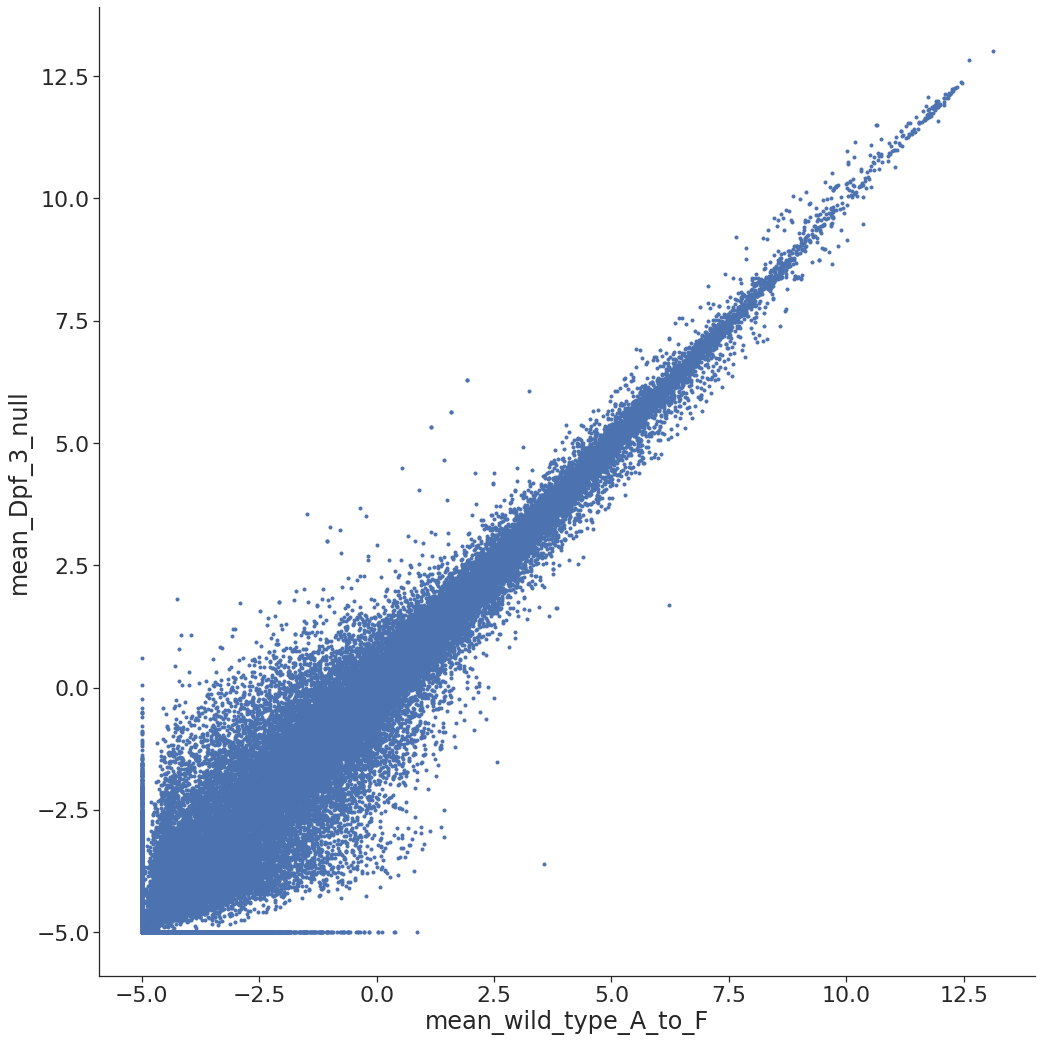

In [13]:
sns_plot = sns.lmplot(x=f"mean_wild_type_A_to_F",
                      y=f"mean_Dpf_3_null",
                      data=tpm,
                      fit_reg=False,
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

In [14]:
gene_info_path = "/tungstenfs/groups/gbioinfo/DB/WormBase/WS270/c_elegans.PRJNA13758.WS270.geneIDs.txt"

In [15]:
gene_info = pd.read_csv(gene_info_path, header=None, sep=",")

In [16]:
gene_info.fillna("?", inplace=True)

In [17]:
histone_genes = gene_info[gene_info[2].str.startswith("his")][1].values.tolist()

In [18]:
tpm["Mark"] = "All"
tpm.loc[tpm["Geneid"].isin(histone_genes), "Mark"] = "Histone"

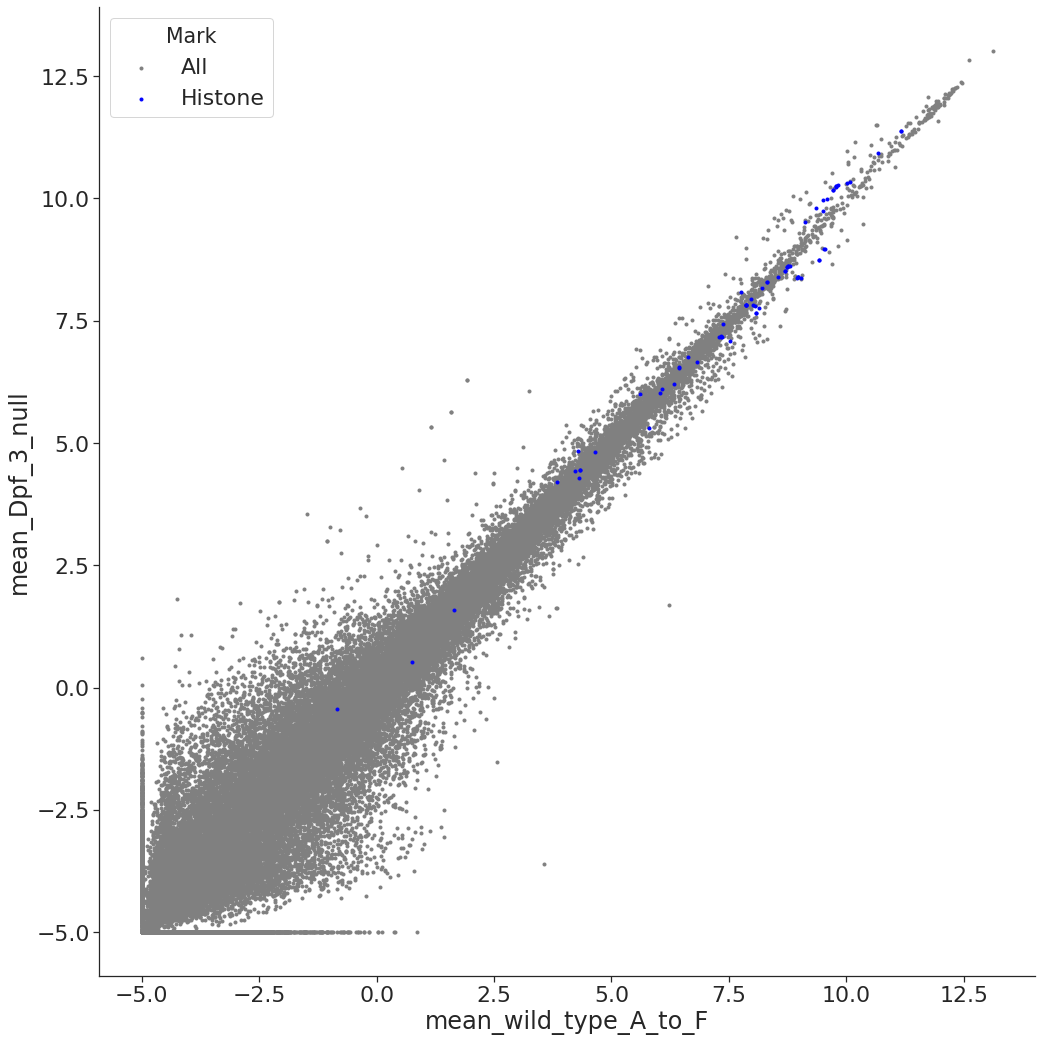

In [19]:
sns_plot = sns.lmplot(x=f"mean_wild_type_A_to_F",
                      y=f"mean_Dpf_3_null",
                      data=tpm,
                      fit_reg=False,
                      hue="Mark",
                      palette=["grey", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

In [20]:
tpm["Mark"] = "Genes"
tpm.loc[~tpm["Geneid"].str.startswith("WBGene"), "Mark"] = "Repeats"

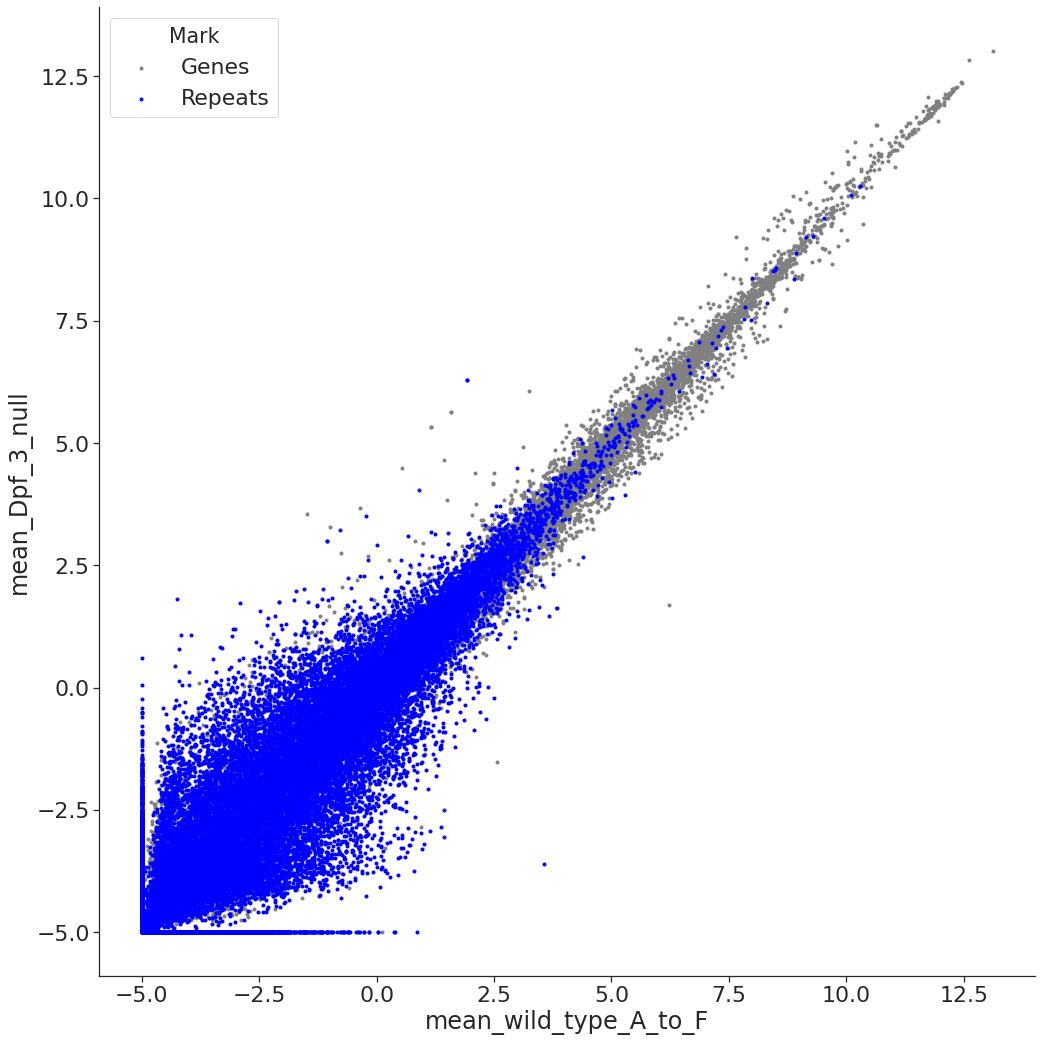

In [21]:
sns_plot = sns.lmplot(x=f"mean_wild_type_A_to_F",
                      y=f"mean_Dpf_3_null",
                      data=tpm,
                      fit_reg=False,
                      hue="Mark",
                      palette=["grey", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

# small RNA-seq

In [22]:
df_length_info = df[["Geneid", "Length"]].copy()

In [23]:
df_length_info.columns = ["Name", "Length"]

In [24]:
df_small_RNA = pd.read_csv("../../01_small_RNA_seq_15_C/results/counts/1_alignment_per_read_reverse/counts.tsv", 
                 sep="\t", 
                 header=0,
                 low_memory=False)

In [25]:
df_small_RNA = df_length_info.merge(df_small_RNA, on="Name")

In [26]:
sample_reads_small_RNA = df_small_RNA.iloc[:,2:].copy()
gene_len = df_small_RNA.loc[:, ['Length']]
rate = sample_reads_small_RNA.values / gene_len.values
tpm_small_RNA = pd.DataFrame(rate / np.sum(rate, axis=0).reshape(1, -1) * 1e6, columns=df_small_RNA.columns[2:], index=[df_small_RNA.Name])

In [27]:
tpm_small_RNA = tpm_small_RNA + 1/32
tpm_small_RNA = np.log2(tpm_small_RNA)

In [28]:
tpm_small_RNA.reset_index(inplace=True)

In [29]:
tpm_small_RNA.columns = tpm_small_RNA.columns.str.replace("counts_", "")

In [30]:
tpm_small_RNA["mean_wild_type_A_to_F"] = tpm_small_RNA[["wild_type_A", "wild_type_B", "wild_type_C", "wild_type_D", "wild_type_E", "wild_type_F"]].mean(axis=1)
tpm_small_RNA["mean_Dpf_3_null"] = tpm_small_RNA[["Dpf_3_null_A", "Dpf_3_null_B", "Dpf_3_null_C"]].mean(axis=1)
tpm_small_RNA["mean_Dpf_3_null"] = tpm_small_RNA[["Dpf_3_null_A", "Dpf_3_null_B", "Dpf_3_null_C"]].mean(axis=1)
tpm_small_RNA["mean_Dpf_3_S784A"] = tpm_small_RNA[["Dpf_3_S784A_A", "Dpf_3_S784A_B", "Dpf_3_S784A_C"]].mean(axis=1)
tpm_small_RNA["mean_mut_2"] = tpm_small_RNA[["mut_2_A", "mut_2_B", "mut_2_C"]].mean(axis=1)
tpm_small_RNA["mean_mut_2"] = tpm_small_RNA[["mut_7_A", "mut_7_B", "mut_7_C"]].mean(axis=1)

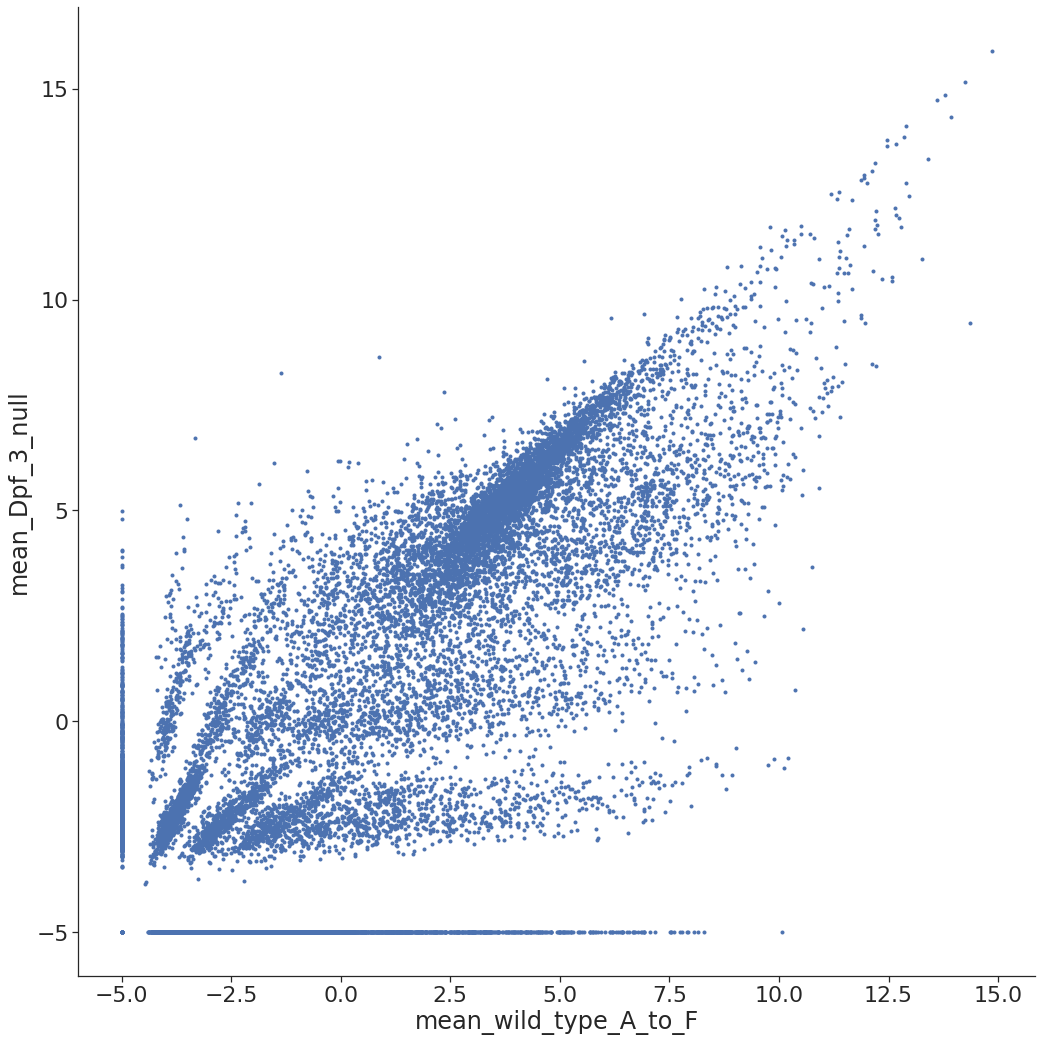

In [31]:
sns_plot = sns.lmplot(x=f"mean_wild_type_A_to_F",
                      y=f"mean_Dpf_3_null",
                      data=tpm_small_RNA,
                      fit_reg=False,
                      palette=["grey", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

In [32]:
tpm_small_RNA["Mark"] = "All"
tpm_small_RNA.loc[tpm_small_RNA["Name"].isin(histone_genes), "Mark"] = "Histone"

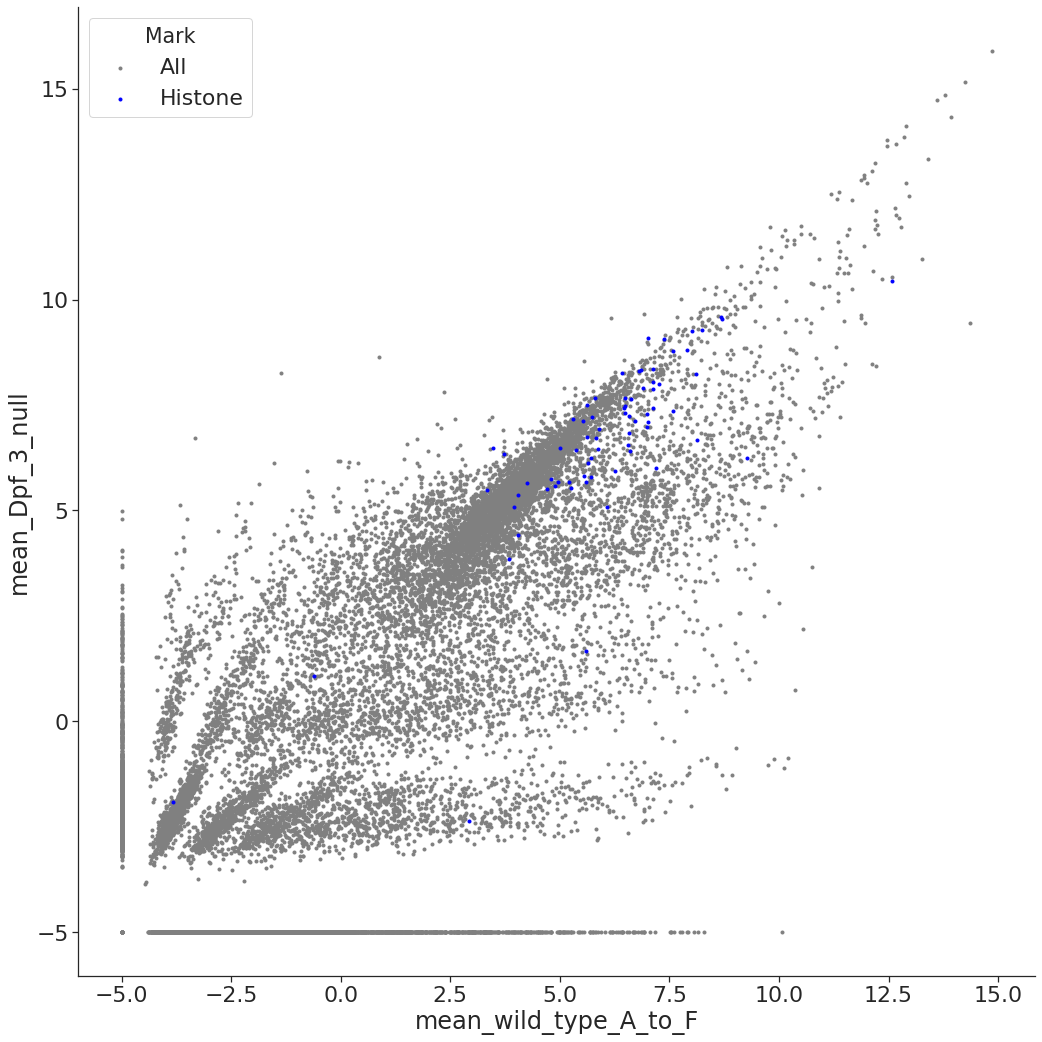

In [33]:
sns_plot = sns.lmplot(x=f"mean_wild_type_A_to_F",
                      y=f"mean_Dpf_3_null",
                      data=tpm_small_RNA,
                      fit_reg=False,
                      hue="Mark",
                      palette=["grey", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)

In [34]:
tpm_small_RNA["Mark"] = "Genes"
tpm_small_RNA.loc[~tpm_small_RNA["Name"].str.startswith("WBGene"), "Mark"] = "Repeats"

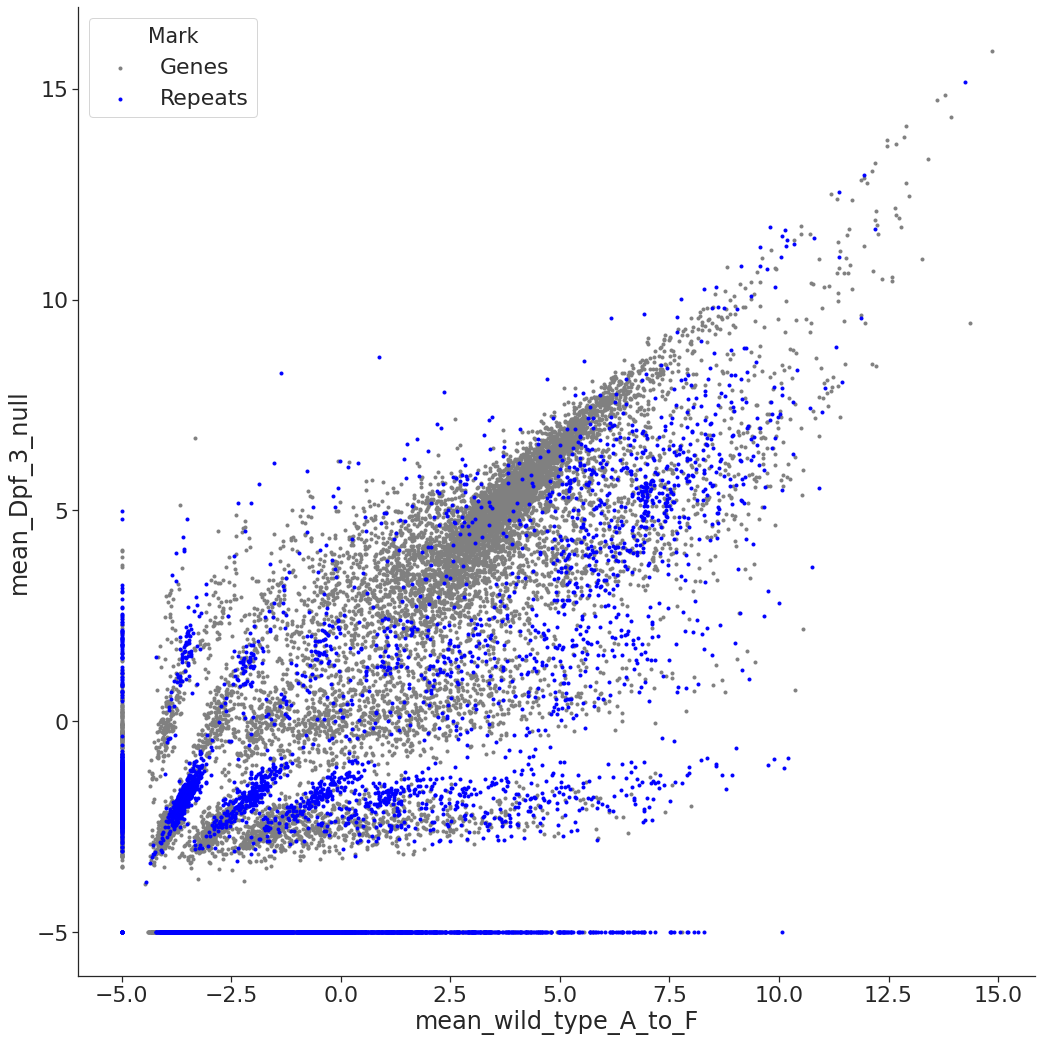

In [35]:
sns_plot = sns.lmplot(x=f"mean_wild_type_A_to_F",
                      y=f"mean_Dpf_3_null",
                      data=tpm_small_RNA,
                      fit_reg=False,
                      hue="Mark",
                      palette=["grey", "blue", "red"],
                      scatter_kws={'alpha':alpha},
                      height=height,
                      aspect=aspect,
                      x_jitter=x_jitter,
                      y_jitter=y_jitter,
                      markers=marker,
                      legend=legend,
                      legend_out = legend_out)